In [9]:
!pip install datasets pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [10]:
!pip install bitsandbytes accelerate transformers peft


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [11]:
# Step 1: Load the dataset and basic info
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset("yuan-yang/MALLS-v0", split="train")
df = pd.DataFrame(dataset)

print("Number of rows:", len(df))
print("Columns:", df.columns)
print("Sample NL:", df['NL'][0])
print("Sample FOL:", df['FOL'][0])
print("Avg. NL length:", df['NL'].apply(len).mean())
print("Avg. FOL length:", df['FOL'].apply(len).mean())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.27k [00:00<?, ?B/s]

MALLS-v0.1-train.json:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

MALLS-v0.1-test.json:   0%|          | 0.00/231k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/27284 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Number of rows: 27284
Columns: Index(['FOL', 'NL'], dtype='object')
Sample NL: A film can be a drama, have a long runtime, and win multiple awards, or it can be a comedy, have a shorter runtime, and be a box office success.
Sample FOL: ∃x (Film(x) ∧ ((Drama(x) ∧ LongRuntime(x) ∧ MultipleAwards(x)) ∨ (Comedy(x) ∧ ShorterRuntime(x) ∧ BoxOfficeSuccess(x))))
Avg. NL length: 93.09001612666765
Avg. FOL length: 91.05134877583932


In [12]:
# Step 2: Analyze the dataset
df["NL_length"] = df["NL"].apply(lambda x: len(x.split()))
df["FOL_length"] = df["FOL"].apply(lambda x: len(x.split()))

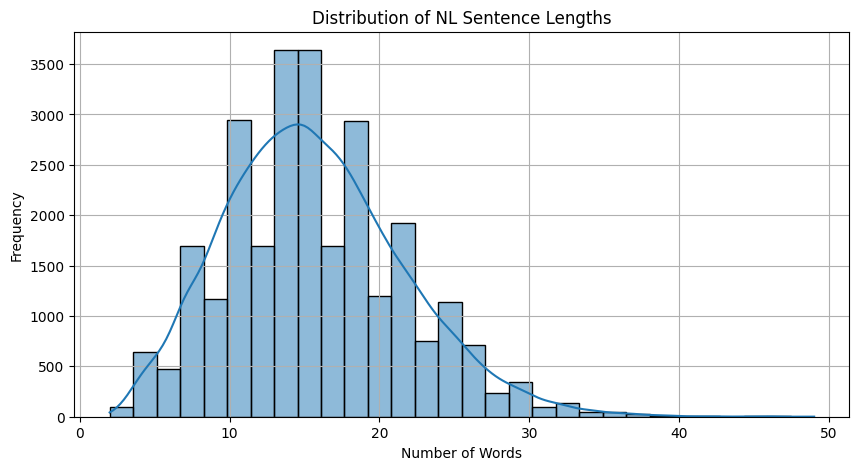

In [13]:
# Plot 1: NL length distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["NL_length"], bins=30, kde=True)
plt.title("Distribution of NL Sentence Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


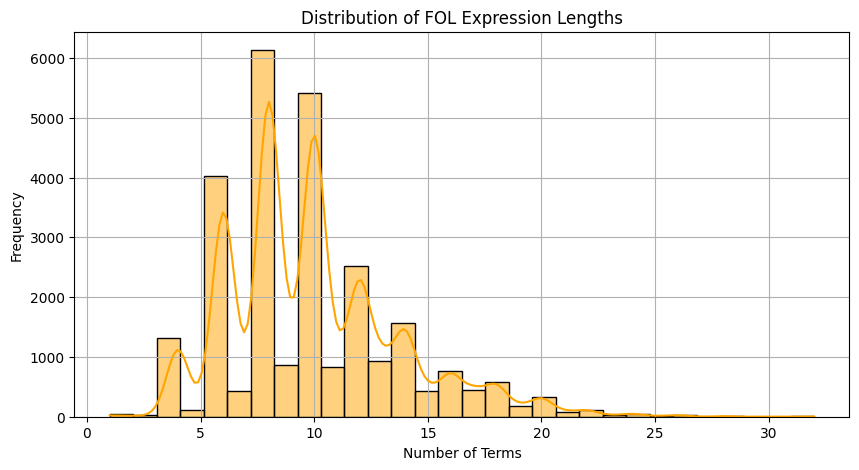

In [14]:
# Plot 2: FOL length distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["FOL_length"], bins=30, kde=True, color='orange')
plt.title("Distribution of FOL Expression Lengths")
plt.xlabel("Number of Terms")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


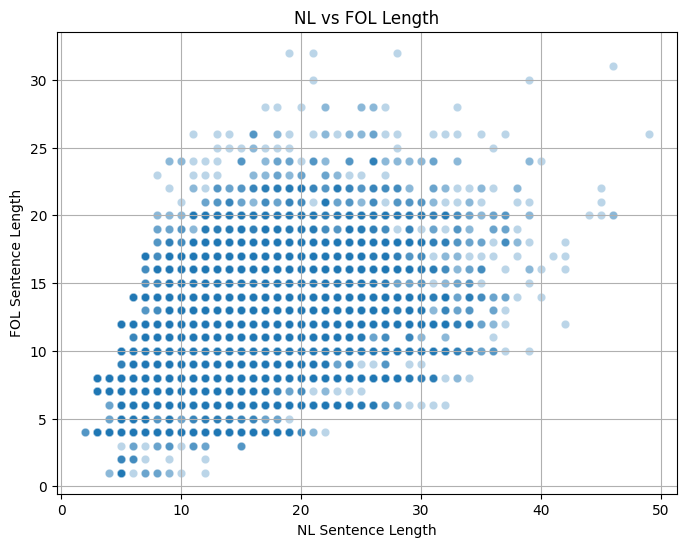

In [15]:
# Plot 3: NL vs FOL length scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(x="NL_length", y="FOL_length", data=df, alpha=0.3)
plt.title("NL vs FOL Length")
plt.xlabel("NL Sentence Length")
plt.ylabel("FOL Sentence Length")
plt.grid(True)
plt.show()

In [16]:
from datasets import load_dataset
import pandas as pd

# Load full dataset with both splits
dataset = load_dataset("yuan-yang/MALLS-v0")

train_ds = dataset["train"]
test_ds = dataset["test"]

# Print dataset size
print("Training set size:", len(train_ds))
print("Test set size:", len(test_ds))
print("\n")

# Show 2 training examples
print("=== Sample Training Examples ===")
for i in range(2):
    print(f"\n[Train #{i+1}]")
    print("NL :", train_ds[i]['NL'])
    print("FOL:", train_ds[i]['FOL'])

# Show 2 test examples
print("\n=== Sample Test Examples ===")
for i in range(2):
    print(f"\n[Test #{i+1}]")
    print("NL :", test_ds[i]['NL'])
    print("FOL:", test_ds[i]['FOL'])


Training set size: 27284
Test set size: 1000


=== Sample Training Examples ===

[Train #1]
NL : A film can be a drama, have a long runtime, and win multiple awards, or it can be a comedy, have a shorter runtime, and be a box office success.
FOL: ∃x (Film(x) ∧ ((Drama(x) ∧ LongRuntime(x) ∧ MultipleAwards(x)) ∨ (Comedy(x) ∧ ShorterRuntime(x) ∧ BoxOfficeSuccess(x))))

[Train #2]
NL : If a person is a librarian, they either work in a public library or an academic library.
FOL: ∀x (Person(x) ∧ Librarian(x) → WorkInPublicLibrary(x) ⊕ WorkInAcademicLibrary(x))

=== Sample Test Examples ===

[Test #1]
NL : A vacation is relaxing if it includes beautiful scenery and enjoyable activities.
FOL: ∀x (Vacation(x) ∧ Relaxing(x) → (BeautifulScenery(x) ∧ EnjoyableActivities(x)))

[Test #2]
NL : A gemstone can be a diamond, a ruby, or an emerald, but not more than one type of gemstone.
FOL: ∀x (Gemstone(x) → ((Diamond(x) ∧ ¬(Ruby(x) ∨ Emerald(x))) ∨ (Ruby(x) ∧ ¬(Diamond(x) ∨ Emerald(x))) ∨ (Emerald(x) 